# LSTM model to forecast the Death cases India 

In [12]:
!pip install Tensorflow

In [13]:
!pip install keras

# Importing required libraries and reading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

In [3]:
df_d = pd.read_csv('time_series_covid19_deaths_global.csv',index_col='Country/Region')
df_con = pd.read_csv('time_series_covid19_confirmed_global.csv',index_col='Country/Region')
df_r = pd.read_csv('time_series_covid19_recovered_global.csv',index_col='Country/Region')

## dropping the irrelevant columns

In [4]:
df1 = df_con.drop(['Province/State','Long','Lat'],axis=1)
df2 = df_d.drop(['Province/State','Long','Lat'],axis=1)
df3 = df_r.drop(['Province/State','Long','Lat'],axis=1)

In [12]:
df1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
Albania,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
Algeria,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
Andorra,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
Angola,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [6]:
df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
Albania,0,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
Algeria,0,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [7]:
df3.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
Albania,0,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
Algeria,0,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
Andorra,0,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
Angola,0,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


# Swapping rows and columns to get the date as index column

In [8]:
df_con_trans =df1.transpose()
df_d_trans =df2.transpose()
df_r_trans =df3.transpose()

In [9]:
df_con_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,2,0,0,0,0,0


In [10]:
df_d_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_r_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Loc India from all the 3 datasets to make a new dataset with 
- India confirmed Case
- India deaths
- India recovered cases

In [13]:
data1 = df_con_trans.loc[:,['India']]
data2 = df_d_trans.loc[:,['India']]
data3 = df_r_trans.loc[:,['India']]

In [14]:
data1.head()

Country/Region,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [15]:
data2.head()

Country/Region,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [16]:
data3.head()

Country/Region,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [18]:
#Concatenating all the 3 columns to 1 dataset
data = pd.concat([data2,data1,data3],axis=1)

In [19]:
data

Country/Region,India,India,India
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,84372,5214677,4112551
9/18/20,85619,5308014,4208431
9/19/20,86752,5400619,4303043
9/20/20,87882,5487580,4396399


In [20]:
data.reset_index(inplace = True)

In [21]:
data

Country/Region,index,India,India,India
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
239,9/17/20,84372,5214677,4112551
240,9/18/20,85619,5308014,4208431
241,9/19/20,86752,5400619,4303043
242,9/20/20,87882,5487580,4396399


In [22]:
data.columns

Index(['index', 'India', 'India', 'India'], dtype='object', name='Country/Region')

### Renaming the columns 

In [23]:
data.columns=['Date','India_deaths','India_confirmed','India_recov']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             244 non-null    object
 1   India_deaths     244 non-null    int64 
 2   India_confirmed  244 non-null    int64 
 3   India_recov      244 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## changing dates to datetime format
##  making the list of columns and dates

In [25]:
cols = list(data)[1:4]

In [26]:
cols

['India_deaths', 'India_confirmed', 'India_recov']

In [27]:
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)

In [231]:
data

,Date,India_deaths,India_confirmed,India_recov
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
239,2020-09-17,84372,5214677,4112551
240,2020-09-18,85619,5308014,4208431
241,2020-09-19,86752,5400619,4303043
242,2020-09-20,87882,5487580,4396399


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

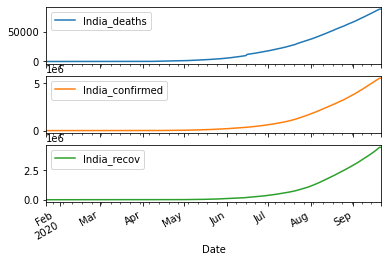

In [232]:
data.set_index('Date')[['India_deaths','India_confirmed','India_recov']].plot(subplots=True)

In [233]:
datelist=list(data['Date'])

In [234]:
datelist[-1]

Timestamp('2020-09-21 00:00:00')

In [235]:
data1 = data.iloc[:,1:4]

In [236]:
data1

,India_deaths,India_confirmed,India_recov
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
239,84372,5214677,4112551
240,85619,5308014,4208431
241,86752,5400619,4303043
242,87882,5487580,4396399


In [237]:
data1 =data1[cols].astype(str)
for i in cols:
    for j in range(0,len(data)):
        data1[i][j] = data1[i][j].replace(',','')
        
data1 = data1.astype(float)

In [238]:
dataset = data.loc[:,'Date']

In [239]:
dataset_train = pd.concat([dataset,data1],axis=1)

In [240]:
dataset_train

,Date,India_deaths,India_confirmed,India_recov
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
239,2020-09-17,84372.0,5214677.0,4112551.0
240,2020-09-18,85619.0,5308014.0,4208431.0
241,2020-09-19,86752.0,5400619.0,4303043.0
242,2020-09-20,87882.0,5487580.0,4396399.0


In [241]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             244 non-null    datetime64[ns]
 1   India_deaths     244 non-null    float64       
 2   India_confirmed  244 non-null    float64       
 3   India_recov      244 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.8 KB


In [242]:
dataset_train = dataset_train.set_index('Date')

In [243]:
dataset_train

,India_deaths,India_confirmed,India_recov
Date,,,
2020-01-22,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0
...,...,...,...
2020-09-17,84372.0,5214677.0,4112551.0
2020-09-18,85619.0,5308014.0,4208431.0
2020-09-19,86752.0,5400619.0,4303043.0


# Plot 3 columns

<AxesSubplot:xlabel='Date'>

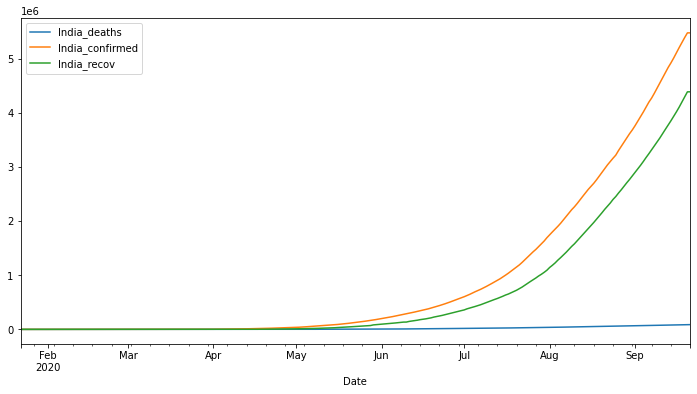

In [244]:
dataset_train.plot(figsize=(12,6))

## Decompose to find the seasonality ,trend and noise

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose

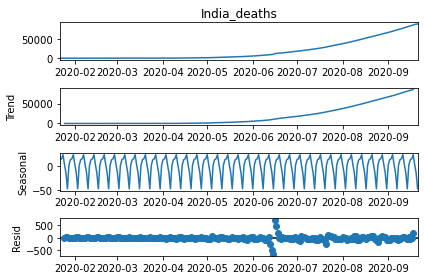

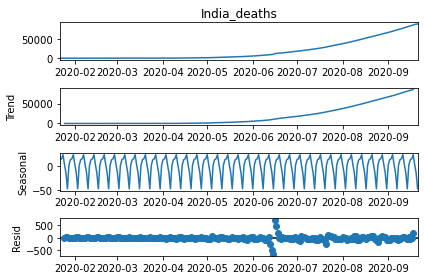

In [246]:
results = seasonal_decompose(dataset_train['India_deaths'])
results.plot()

# Scaling the dataset

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset_train)

In [249]:
dataset_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.82229690e-07, 0.00000000e+00],
       [0.00000000e+00, 1.82229690e-07, 0.00000000e+00],
       [0.00000000e+00, 1.82229690e-07, 0.00000000e+00],
       [0.00000000e+00, 3.64459379e-07, 0.00000000e+00],
       [0.00000000e+00, 5.46689069e-07, 0.00000000e+00],
       [0.00000000e+00, 5.46689069e-07, 0.00000000e+00],
       [0.00000000e+00, 5.46689069e-07, 0.00000000e+00],
       [0.00000000e+00, 5.46689069e-07, 0.00000000e+00],
       [0.00000000e+00, 5.46689069e-07, 0.00000000e+00],
       [0.00000000e+00, 5.46689

In [250]:
dataset_scaled.shape

(244, 3)

In [251]:
features = dataset_scaled
target = dataset_scaled[:,0]

# Splitting the dataset as training and testing data

In [252]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=50,shuffle=False)

In [253]:
X_train.shape

(195, 3)

In [254]:
X_test.shape

(49, 3)

# Timeseries generator is used to specify the input(training data) and output (testing data) 
- Rolling window 5 
- batch size 10

In [255]:
win_length =5
batch_size = 10
num_features = 3
train_generator = TimeseriesGenerator(X_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [256]:
X,y =train_generator[1]

In [257]:
X.shape

(10, 5, 3)

In [258]:
y.shape

(10,)

In [259]:
train_x = list(train_generator)

In [260]:
train_x[0]

(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.000

# Applying the LSTM model
- Using LeakyReLu as the activation function
- using dropouts to avoid overfitting

In [261]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [262]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 5, 128)            67584     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 5, 128)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

# Applying earlystopping to stop training once the model performance stops improving on the validation dataset


In [263]:
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min',verbose=1)

In [264]:
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer = tf.optimizers.Adam(),
             metrics = [tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator,epochs=50,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[earlyStopping])

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 10s 139ms/step - loss: 0.0014 - mean_absolute_error: 0.0137 - val_loss: 0.2288 - val_mean_absolute_error: 0.4637
Epoch 2/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0206 - mean_absolute_error: 0.1345 - val_loss: 0.2593 - val_mean_absolute_error: 0.5001
Epoch 3/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0011 - mean_absolute_error: 0.0315 - val_loss: 0.0208 - val_mean_absolute_error: 0.1349
Epoch 4/50
19/19 [==============================] - 0s 22ms/step - loss: 8.8573e-04 - mean_absolute_error: 0.0220 - val_loss: 0.0254 - val_mean_absolute_error: 0.1416
Epoch 5/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0051 - mean_absolute_error: 0.0572 - val_loss: 0.3797 - val_mean_absolute_error: 0.6027
Epoch 6/50
19/19 [==============================] - 0s 22ms/step - loss: 0.0057 - mean_absolute_error: 0.0703 - val_loss: 0.2493 - val_mean_absolute_error: 0.4885
Epoch 7/50
19/19

## mean squared error =0.00131
## mean_absolute error = 0.0330

In [265]:
model.evaluate_generator(test_generator,verbose = 0)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0013121854281052947, 0.03306559473276138]

# Predicting and forecasting

In [266]:
predictions = model.predict_generator(test_generator)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [267]:
predictions.shape[0]

44

In [268]:
predictions

array([[0.53588945],
       [0.5480781 ],
       [0.5603872 ],
       [0.5726242 ],
       [0.5847578 ],
       [0.59679663],
       [0.6084803 ],
       [0.6205648 ],
       [0.6328138 ],
       [0.64484036],
       [0.6565789 ],
       [0.6680169 ],
       [0.67944026],
       [0.69094706],
       [0.7027874 ],
       [0.7142572 ],
       [0.72545147],
       [0.7362175 ],
       [0.74660337],
       [0.75689244],
       [0.76751286],
       [0.7783611 ],
       [0.78968006],
       [0.80040973],
       [0.8108628 ],
       [0.8210181 ],
       [0.8310112 ],
       [0.84097886],
       [0.8513619 ],
       [0.861825  ],
       [0.87219787],
       [0.8824852 ],
       [0.89263177],
       [0.90258855],
       [0.9125852 ],
       [0.9226705 ],
       [0.9327056 ],
       [0.9425622 ],
       [0.95222485],
       [0.9615003 ],
       [0.9706219 ],
       [0.97966963],
       [0.9889139 ],
       [0.9979588 ]], dtype=float32)

In [269]:
X_test[:,1:][win_length:]

array([[0.40365225, 0.34931839],
       [0.41341994, 0.36017864],
       [0.42452921, 0.37294135],
       [0.43673842, 0.38576617],
       [0.44850189, 0.39840674],
       [0.46029798, 0.41145856],
       [0.47196615, 0.42358712],
       [0.48248281, 0.43668511],
       [0.49250872, 0.44983883],
       [0.50427566, 0.46351935],
       [0.51697196, 0.47690485],
       [0.52952759, 0.49107144],
       [0.54226107, 0.50554488],
       [0.55487847, 0.51873499],
       [0.56606883, 0.53180683],
       [0.57718029, 0.54694422],
       [0.5876082 , 0.55917104],
       [0.60322291, 0.57405413],
       [0.61730307, 0.58774192],
       [0.63123854, 0.60253812],
       [0.64559113, 0.61730817],
       [0.65989835, 0.63115313],
       [0.67264003, 0.64595638],
       [0.68691901, 0.66006475],
       [0.70220498, 0.67566479],
       [0.71739218, 0.69082697],
       [0.73314266, 0.70676547],
       [0.7496585 , 0.723516  ],
       [0.76620532, 0.73933895],
       [0.78001997, 0.75606195],
       [0.

# Concatinating prediction  and testing datas two other features column  to reverse the scale(requires same shape to do the reversing)

In [270]:
df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [271]:
df_pred

,0,0,1
0,0.535889,0.403652,0.349318
1,0.548078,0.413420,0.360179
2,0.560387,0.424529,0.372941
3,0.572624,0.436738,0.385766
4,0.584758,0.448502,0.398407
5,0.596797,0.460298,0.411459
6,0.608480,0.471966,0.423587
7,0.620565,0.482483,0.436685
8,0.632814,0.492509,0.449839
9,0.644840,0.504276,0.463519


In [272]:
rev_trans = scaler.inverse_transform(df_pred)

In [273]:
rev_trans

array([[  47095.036358  , 2215074.        , 1535743.        ],
       [  48166.20132029, 2268675.        , 1583489.        ],
       [  49247.94739687, 2329638.        , 1639599.        ],
       [  50323.36051941, 2396637.        , 1695982.        ],
       [  51389.68540764, 2461190.        , 1751555.        ],
       [  52447.68159699, 2525922.        , 1808936.        ],
       [  53474.46349919, 2589952.        , 1862258.        ],
       [  54536.47736907, 2647663.        , 1919842.        ],
       [  55612.94336486, 2702681.        , 1977671.        ],
       [  56669.86049008, 2767253.        , 2037816.        ],
       [  57701.46675181, 2836925.        , 2096664.        ],
       [  58706.66213322, 2905825.        , 2158946.        ],
       [  59710.56892347, 2975701.        , 2222577.        ],
       [  60721.80915928, 3044940.        , 2280566.        ],
       [  61762.36222458, 3106348.        , 2338035.        ],
       [  62770.34955347, 3167323.        , 2404585.   

## final dataset is made with testing data and prediction column

In [274]:
df_final  = dataset_train[predictions.shape[0]*-1:]

In [275]:
df_final.count()

India_deaths       44
India_confirmed    44
India_recov        44
dtype: int64

In [276]:
df_final['pred']=rev_trans[:,0].round(1)

<ipython-input-276-d4a835ac7dd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred']=rev_trans[:,0].round(1)


In [277]:
df_final

,India_deaths,India_confirmed,India_recov,pred
Date,,,,
2020-08-09,44386.0,2215074.0,1535743.0,47095.0
2020-08-10,45257.0,2268675.0,1583489.0,48166.2
2020-08-11,46091.0,2329638.0,1639599.0,49247.9
2020-08-12,47033.0,2396637.0,1695982.0,50323.4
2020-08-13,48040.0,2461190.0,1751555.0,51389.7
2020-08-14,49036.0,2525922.0,1808936.0,52447.7
2020-08-15,49980.0,2589952.0,1862258.0,53474.5
2020-08-16,50921.0,2647663.0,1919842.0,54536.5
2020-08-17,51797.0,2702681.0,1977671.0,55612.9


# India_deaths is the testing data and pred is the predicted value

<AxesSubplot:xlabel='Date'>

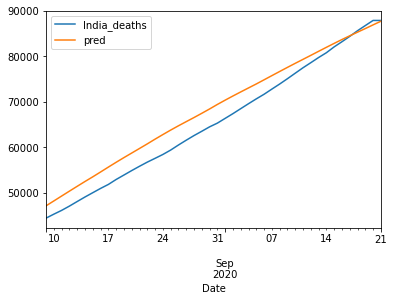

In [278]:
df_final[['India_deaths','pred']].plot()

## An LSTM model has been developed to predict India death cases
# mean squared error =0.00131
# mean_absolute error = 0.0330